In [ ]:
#Scipy:
#We have the min and max temperatures in a city In India for each months of the year.
#We would like to find a function to describe this and show it graphically, the dataset
#given below.
#Task:
#1. fitting it to the periodic function
#2. plot the fit
#Data
#Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
#Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import linalg 
from scipy import optimize

temp_max=np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min=np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
months =list(range(1,13))
Months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

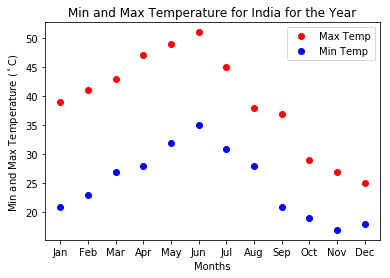

In [6]:
# Question1: Fitting it to the periodic function

def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months, temp_max, [45,35,30])
res_min, cov_min = optimize.curve_fit(yearly_temps, months, temp_min, [20,30,40])


plt.plot(months,temp_max,'ro',label='Max Temp')
plt.plot(months,temp_min,'bo',label='Min Temp')
plt.xticks(months,Months)
plt.xlabel('Months')
plt.ylabel('Min and Max Temperature ($^\circ$C) ')
plt.title('Min and Max Temperature for India for the Year')
plt.legend()
plt.show()

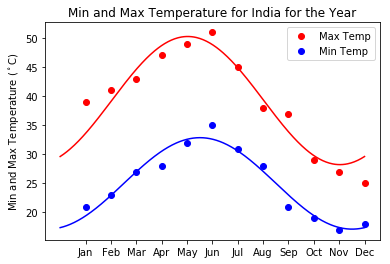

In [10]:
##Plot the Fit

days = np.linspace(0, 12, num=365)
plt.figure()
plt.plot(months, temp_max, 'ro',label='Max Temp')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo', label='Min Temp')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xticks(months,Months)
plt.ylabel('Min and Max Temperature ($^\circ$C)')
plt.title('Min and Max Temperature for India for the Year')
plt.legend()
plt.show()

In [ ]:
#Matplotlib:
#This assignment is for visualization using matplotlib:
#data to use: url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
#titanic = pd.read_csv(url)
#Charts to plot:
#Create a pie chart presenting the male/female proportion
#Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [16]:
url=('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')

titanic = pd.read_csv(url)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


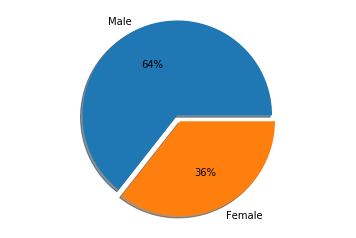

In [18]:
# Question 3: A pie chart representing the male and female proportion

Male_Count=titanic.loc[(titanic.sex=='male')].sex.count()
FeMale_Count=titanic.loc[(titanic.sex=='female')].sex.count()

labels = ['Male', 'Female']
sizes = [Male_Count, FeMale_Count]
explode = (0.07,0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,explode=explode, autopct='%1.0f%%',shadow=True, startangle=0)
ax1.axis('equal')  
plt.show()

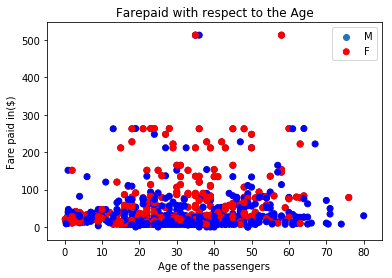

In [20]:
# Question 4: A scatterplot with the Fare paid and the Age, differ the plot color by gender

titanic = titanic.dropna(subset=['sex'])

Age=titanic.age
Fare=titanic.fare
Sex=pd.factorize(titanic['sex'])[0]
plt.scatter(Age,Fare,c=Sex)

Sex=titanic['sex'].map({'male' : 'blue', 'female' : 'red'})

plt.title('Farepaid with respect to the Age')
plt.xlabel('Age of the passengers')
plt.ylabel('Fare paid in($)')
plt.scatter(Age,Fare,c=Sex)
plt.legend('MF')
plt.show()